# Lever-center trial unique data

We want to get single trials data at the lever.

We can use the navPath that includes all the journey with at least a lever press.

For each neuron, we want to have a matrix with rate as a function of journey (navPath) characteristics

* Distance from lever
* Angle from lever to animal when the animal is close to the lever

We can then use these matrices to compare activity during trials with accurate and inacurate homing.

In [1]:
%load_ext autoreload
%autoreload 2
%run setup_project.py
prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 40 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:27<00:00,  1.46it/s]

Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


In [2]:
%%time
myProjectWithTrials = loadMyProjectWithTrials(myProject)

Loading: /adata/projects/autopi_ca1/results/myProjectWithTrials.pickle
CPU times: user 5.51 s, sys: 3.03 s, total: 8.54 s
Wall time: 13.9 s


## Replicate standard map findings

We will first calculate a rate-lever_distance histogram and a polar plot of the firing around the lever. 

We can use this to validate our analysis relative to standard maps.

We start with a single sesson 

In [123]:
def rateHistoAroundLever(na,navPathType="all",light="light",nLeverMin=1,behavioralVariable="animalAngleFromLever",maxDistFromLever=15,nBins=36):
    """
    Create a rate x orientation around lever histogram
    
    The histogram is stored in a dictionary within na
    """
    names = na.getNavPathNames(navPathType=navPathType,light=light,nLeverMin=nLeverMin)
    naIfr,naInav = na.getSingleNavPathData(navPathNames=names)
    indices =naInav.targetDistance<maxDistFromLever # only keep near the lever
    res = stats.binned_statistic(naInav[behavioralVariable][indices],naIfr[indices],bins=np.arange(-np.pi,np.pi,np.pi/nBins))
    na.navPathResultsDict["histo"][navPathType+"_"+light+"_"+behavioralVariable] = {"histo":res[0],"bins":res[1]}


In [126]:
def leverCenteredIFRMaps(ses,sSes):
    #
    print(ses.name)
    
    # load raw data from file
    ifr, navs, inav = load_ifr_behavior(ses)
    
    # create a list of NeuronAutopi object
    naList=[]
    for i, n in enumerate(sSes.cg.neuron_list):
        neuronIndex=i
        cluId = sSes.name+"_"+n.spike_train.name
        na = NeuronAutopi(name = cluId, ifr = (ifr[0][neuronIndex,:],ifr[1]),navPathSummary=navs,iNavPath=inav,trialElectro=ses.trialList[0])
        naList.append(na)
   
    # add a behavioral variable from existing ones
    inav["animalAngleFromLever"]=np.arctan2(inav.targetToAnimalY,inav.targetToAnimalX)
    
    # create the matrix with the rate * lever distance * journey
    # create the histogram with rate * lever distance
    # create the histogram with rate * orientation around lever
    for light in ["light","dark"]:
        print("light:", light)
        for i, na in enumerate(naList):
            na.navPathBehavioralMatrix(navPathType="all",light=light,nLeverMin = 1,behavioralVariable = "targetDistance",bins=np.arange(0,70,2)) # per journey
            na.navPathBehavioralHistogram(navPathType="all",light=light,nLeverMin = 1,behavioralVariable = "targetDistance",bins=np.arange(0,40,2)) # all journeys together
            rateHistoAroundLever(na,navPathType="all",light=light,nLeverMin=1,behavioralVariable="animalAngleFromLever",maxDistFromLever=15,nBins=36)  

    
    sesRes={}
    for na in naList:
        sesRes[na.name] = na.navPathResultsDict
    
    return sesRes

In [127]:
ses = myProjectWithTrials.sessionList[0]
sSes = sSesList[0]

In [129]:
res = leverCenteredIFRMaps(ses,sSes)

mn5824-20112020-0107
loading /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/navPathSummary.csv
loading /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/navPathInstan.csv
light: light
light: dark


In [138]:
res = [  leverCenteredIFRMaps(ses,sSes) for ses,sSes in zip(myProjectWithTrials.sessionList[:],sSesList[:])]

mn5824-20112020-0107
loading /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/navPathSummary.csv
loading /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/navPathInstan.csv
light: light
light: dark
mn5824-22112020-0107
loading /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/navPathSummary.csv
loading /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/navPathInstan.csv
light: light
light: dark
mn5824-24112020-0107
loading /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/navPathSummary.csv
loading /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/navPathInstan.csv
light: light
light: dark
mn5824-02122020-0106
loading /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn582

0it [57:29, ?it/s]
0it [56:33, ?it/s]


light: dark
mn711-30012021-0106
loading /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/navPathSummary.csv
loading /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/navPathInstan.csv
light: light
light: dark
mn711-31012021-0107
loading /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/navPathSummary.csv
loading /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/navPathInstan.csv
light: light
light: dark
mn711-01022021-0107
loading /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/navPathSummary.csv
loading /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/navPathInstan.csv
light: light
light: dark
mn711-02022021-0108
loading /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn711/mn711-02022

`res` is a list of dictionaries that we need to merge.

In [143]:
newRes={}
for d in res:
    newRes.update(d)
print("Number of neurons: {}".format(len(newRes)))

Number of neurons: 1297


In [144]:
fn=myProject.dataPath+"/results/leverIFRDict.pickle"
print("saving:",fn)
with open(fn, 'wb') as handle:
    pickle.dump(newRes, handle)

saving: /adata/projects/autopi_ca1/results/leverIFRDict.pickle


We now have a dictionary with all our neurons.

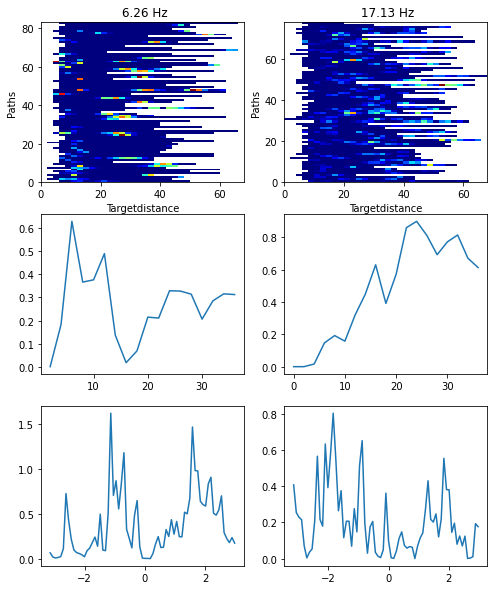

In [84]:
na=naList[4]
fig,axes = plt.subplots(3,2,figsize=(2*4,2*5))
na.plotNavPathBehavioralMatrix(ax=axes[0,0],navPathType="all",light="light",behavioralVariable = "targetDistance")
na.plotNavPathBehavioralMatrix(ax=axes[0,1],navPathType="all",light="dark",behavioralVariable = "targetDistance")

d = na.navPathRateHistoDict['all_light_targetDistance']
axes[1,0].plot(d["bins"][:-1],d["histo"])
d = na.navPathRateHistoDict['all_dark_targetDistance']
axes[1,1].plot(d["bins"][:-1],d["histo"])


d = na.navPathRateHistoDict['all_light_animalAngleFromLever']
axes[2,0].plot(d["bins"][:-1],d["histo"])
d = na.navPathRateHistoDict['all_dark_animalAngleFromLever']
axes[2,1].plot(d["bins"][:-1],d["histo"])
plt.show()